

**IT9002: Natural Language Processing**

Movies Review Sentiment Analysis

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/2560px-IMDB_Logo_2016.svg.png"></center>



Student: Adel AlMuharraqi




This notebook delves into a comprehensive IMDB dataset, featuring 50,000 movie reviews with essential 'review' and 'sentiment' columns. Our primary objective is to identify the best machine learning model for predicting sentiment from movie reviews. Through the exploration of diverse algorithms, we aim to create a robust sentiment prediction model. This not only advances sentiment analysis in movie reviews but also contributes valuable insights to the broader landscape of natural language processing tasks.


Load the libraries




In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
imdb_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/IMDB Dataset.csv')
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [43]:
imdb_data.shape

(50000, 2)

In [44]:
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Exploratery data analysis

In [45]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [46]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

The dataset comprises 50,000 rows, but to expedite the training process in subsequent steps, we will opt for a reduced sample of 6000 rows. This smaller subset will consist of 5000 positive and 1000 negative reviews intentionally creating an imbalanced dataset. This deliberate imbalance serves as a basis for introducing and demonstrating undersampling and oversampling techniques in the upcoming steps

In [47]:
#split the dataset
#train dataset
train_reviews=imdb_data.review[:6000]
train_sentiments=imdb_data.sentiment[:6000]
#test dataset
test_reviews=imdb_data.review[6000:]
test_sentiments=imdb_data.sentiment[6000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(6000,) (6000,)
(44000,) (44000,)


In [48]:
df_positive = imdb_data[review_data['sentiment']=='positive'][:5000]
df_negative = imdb_data[review_data['sentiment']=='negative'][:1000]

review_data_imb = pd.concat([df_positive,df_negative ])

Imbalanced Classes

Typically, there is an abundance of data for one class, accompanied by significantly fewer observations for other classes. This scenario is referred to as imbalanced data, where the distribution of observations across different classes is uneven.


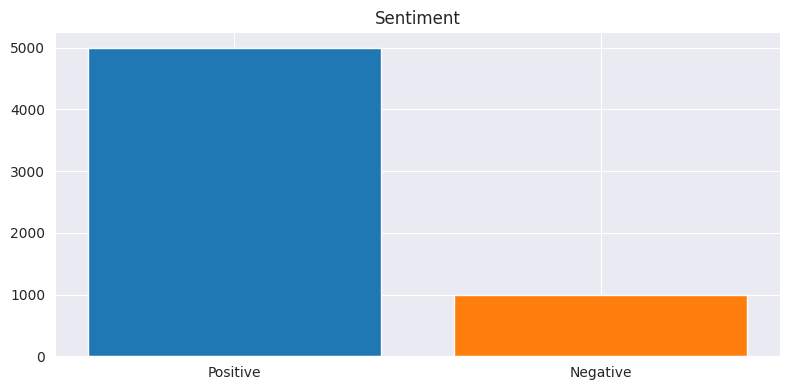

In [49]:
colors = sns.color_palette()

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=review_data_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

Tokenization of text

In [51]:
import nltk
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Removing html strips and noise text

In [52]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

<ipython-input-52-44807a6118ae>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Removing special characters



In [54]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

Stemming the text

In [56]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

Removing stopwords

In [58]:
stop=set(stopwords.words('english'))
print(stop)

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'these', 'the', 'too', 'aren', "aren't", 'doesn', "weren't", 'themselves', "that'll", 'further', 's', 'wouldn', 've', 'should', 'when', 'll', "wouldn't", 'out', 'to', 'through', 'couldn', 'from', 'just', "couldn't", 'into', 'o', 'yours', 'those', 'only', "doesn't", 'that', 'yourself', 'wasn', 'by', 'why', 'needn', 'until', 'there', 'be', 'yourselves', 'been', 'any', 'he', 'don', 'but', 'haven', 'ma', 'an', 'hers', 'both', 'so', 'can', 'off', 'it', 'few', 'is', 'mustn', 'where', 'against', 'most', 'in', 'we', "don't", 'who', 'because', 'am', 'not', "isn't", "mightn't", 'm', 'ourselves', 'her', 'some', 'ain', 'this', 'his', "needn't", 'herself', 'with', 'now', 'here', 'before', 'if', "shouldn't", 'below', 'they', 'you', 'isn', "wasn't", 'which', 'shan', 'for', 'does', 'himself', "you've", "it's", 'their', 'ours', 'above', 'hadn', 'having', 'y', "won't", 'was', 'are', 'had', "she's", 'my', 'then', "you'd", 'will', "you're", 'such', 're', 'has', 'very', 'down', "hadn't", 'him', 'other', "

Train Reviews

In [59]:
norm_train_reviews=imdb_data.review[:6000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

Test Reviews

In [60]:
norm_test_reviews=imdb_data.review[6000:]
norm_test_reviews[7000]

'sorri someon ha say thi realli iswa dull movi worthi perhap dull nonetheless nearli cri boredom watch act pretti dire stori drawn predict score camerawork total standard unexcit one movi allow hate becas disabl peopl hate suspect nearli everyon doe interest critic kind thi movi suppos allow object thi wa made win award rememb duli wa neither interest entertain havent seen play cannot compar'

Bag of World
This model is employed to transform text documents into numerical vectors

In [61]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)

#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (6000, 1167543)
BOW_cv_test: (44000, 1167543)


TF-IDF is particularly useful for extracting meaningful features from text data, aiding in tasks such as text classification, clustering, and search engine ranking.

In [62]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)

#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (6000, 1167543)
Tfidf_test: (44000, 1167543)


Spliting the sentiment data

In [64]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [65]:
train_sentiments=sentiment_data[:6000]
test_sentiments=sentiment_data[6000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


construct logistic regression models using both the bag of words and TF-IDF features

In [66]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


performance of the logistic regression model on the test dataset

In [67]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 1 ... 0 1 0]
[0 0 0 ... 0 1 0]


Test the Accuracy of the model

In [68]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7035
lr_tfidf_score : 0.6789545454545455


Classification

In [69]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.76      0.72     21972
    Negative       0.73      0.64      0.69     22028

    accuracy                           0.70     44000
   macro avg       0.71      0.70      0.70     44000
weighted avg       0.71      0.70      0.70     44000

              precision    recall  f1-score   support

    Positive       0.63      0.86      0.73     21972
    Negative       0.78      0.50      0.61     22028

    accuracy                           0.68     44000
   macro avg       0.70      0.68      0.67     44000
weighted avg       0.70      0.68      0.67     44000



Confusion matrix

In [70]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[14195  7833]
 [ 5213 16759]]
[[11064 10964]
 [ 3162 18810]]


Employing Stochastic Gradient Descent or Linear Support Vector Machines for both bag of words and TF-IDF features

In [71]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


performance on test data

In [72]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 1 ... 0 1 0]
[0 0 1 ... 0 1 0]


Accuracy of the model

In [73]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.7048636363636364
svm_tfidf_score : 0.7023181818181818


classification report

In [74]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.69      0.73      0.71     21972
    Negative       0.72      0.68      0.70     22028

    accuracy                           0.70     44000
   macro avg       0.71      0.70      0.70     44000
weighted avg       0.71      0.70      0.70     44000

              precision    recall  f1-score   support

    Positive       0.68      0.77      0.72     21972
    Negative       0.73      0.64      0.68     22028

    accuracy                           0.70     44000
   macro avg       0.71      0.70      0.70     44000
weighted avg       0.71      0.70      0.70     44000



WordCloud to see negative and positive

WordCloud Positive

<function matplotlib.pyplot.show(close=None, block=None)>

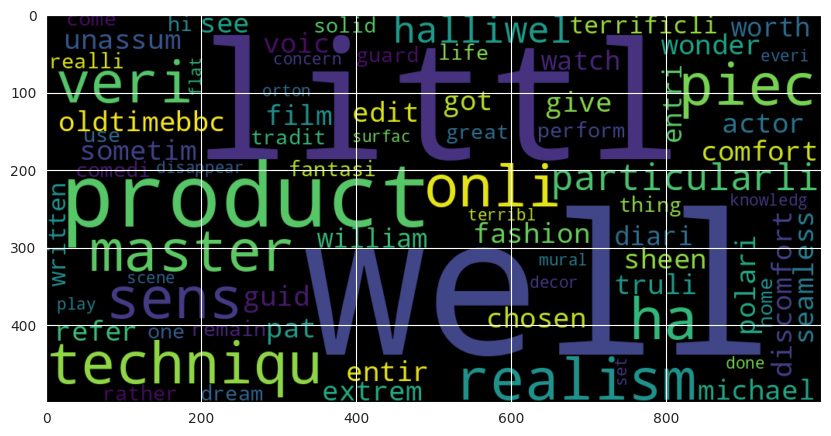

In [75]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

WorldCloud Negative

<function matplotlib.pyplot.show(close=None, block=None)>

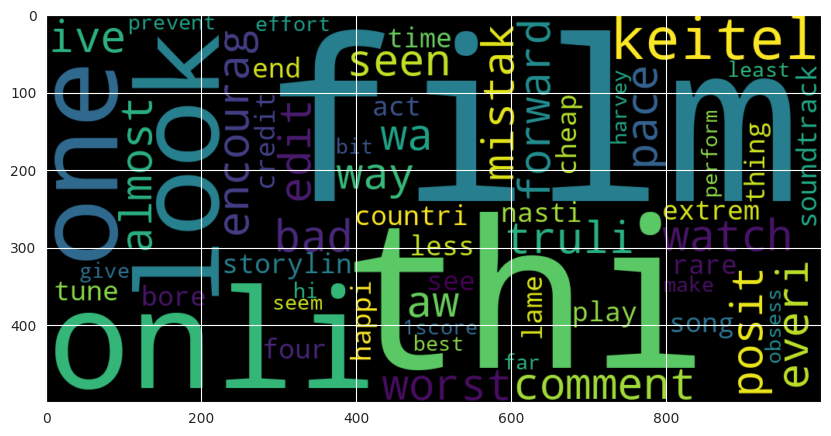

In [76]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show